## Homework 2: Trees and Calibration
### Instructions:
Please upload the .ipynb, .pdf to Github prior to the deadline. Please include your UNI as well.

Make sure to use the dataset that we provide in CourseWorks/Classroom.

There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).

## Name:  
### Ziang Xu
## UNI:
### zx2462

## The Dataset


### Description

The Diabetes Dataset comprises medical data from 768 female patients of Pima Indian heritage, including 8 health-related features and a binary target indicating the presence or absence of diabetes.


In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [4]:
## YOUR CODE HERE
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**1.2: How many instances are there in the dataset for each class (diabetic and non-diabetic patients)? What does this tell you about the balance of the dataset?**

'\nComment:\nBased on the histograms, it appears that the outcome seems to\nbe quite unbalanced (many more 0s than 1s).\n'

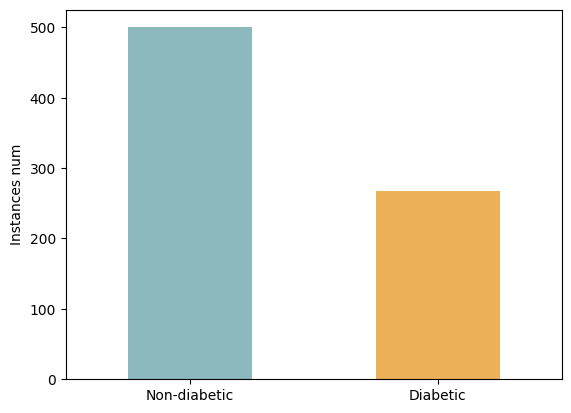

In [5]:
## YOUR CODE HERE
counts = diabetes_df['Outcome'].value_counts()
ax = counts.plot(kind='bar', color=['#8CB9BD', '#ECB159'])
ax.set_ylabel("Instances num")
ax.set_xticklabels(['Non-diabetic', 'Diabetic'])
ax.tick_params(axis='x', rotation=0)

"""
Comment:
Based on the histograms, it appears that the outcome seems to
be quite unbalanced (many more 0s than 1s).
"""

**1.3: Are there any missing values in the dataset? If so, how will you handle them?**

In [6]:
## YOUR CODE HERE
nans = diabetes_df.isna().sum()
print(nans)
# No missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.

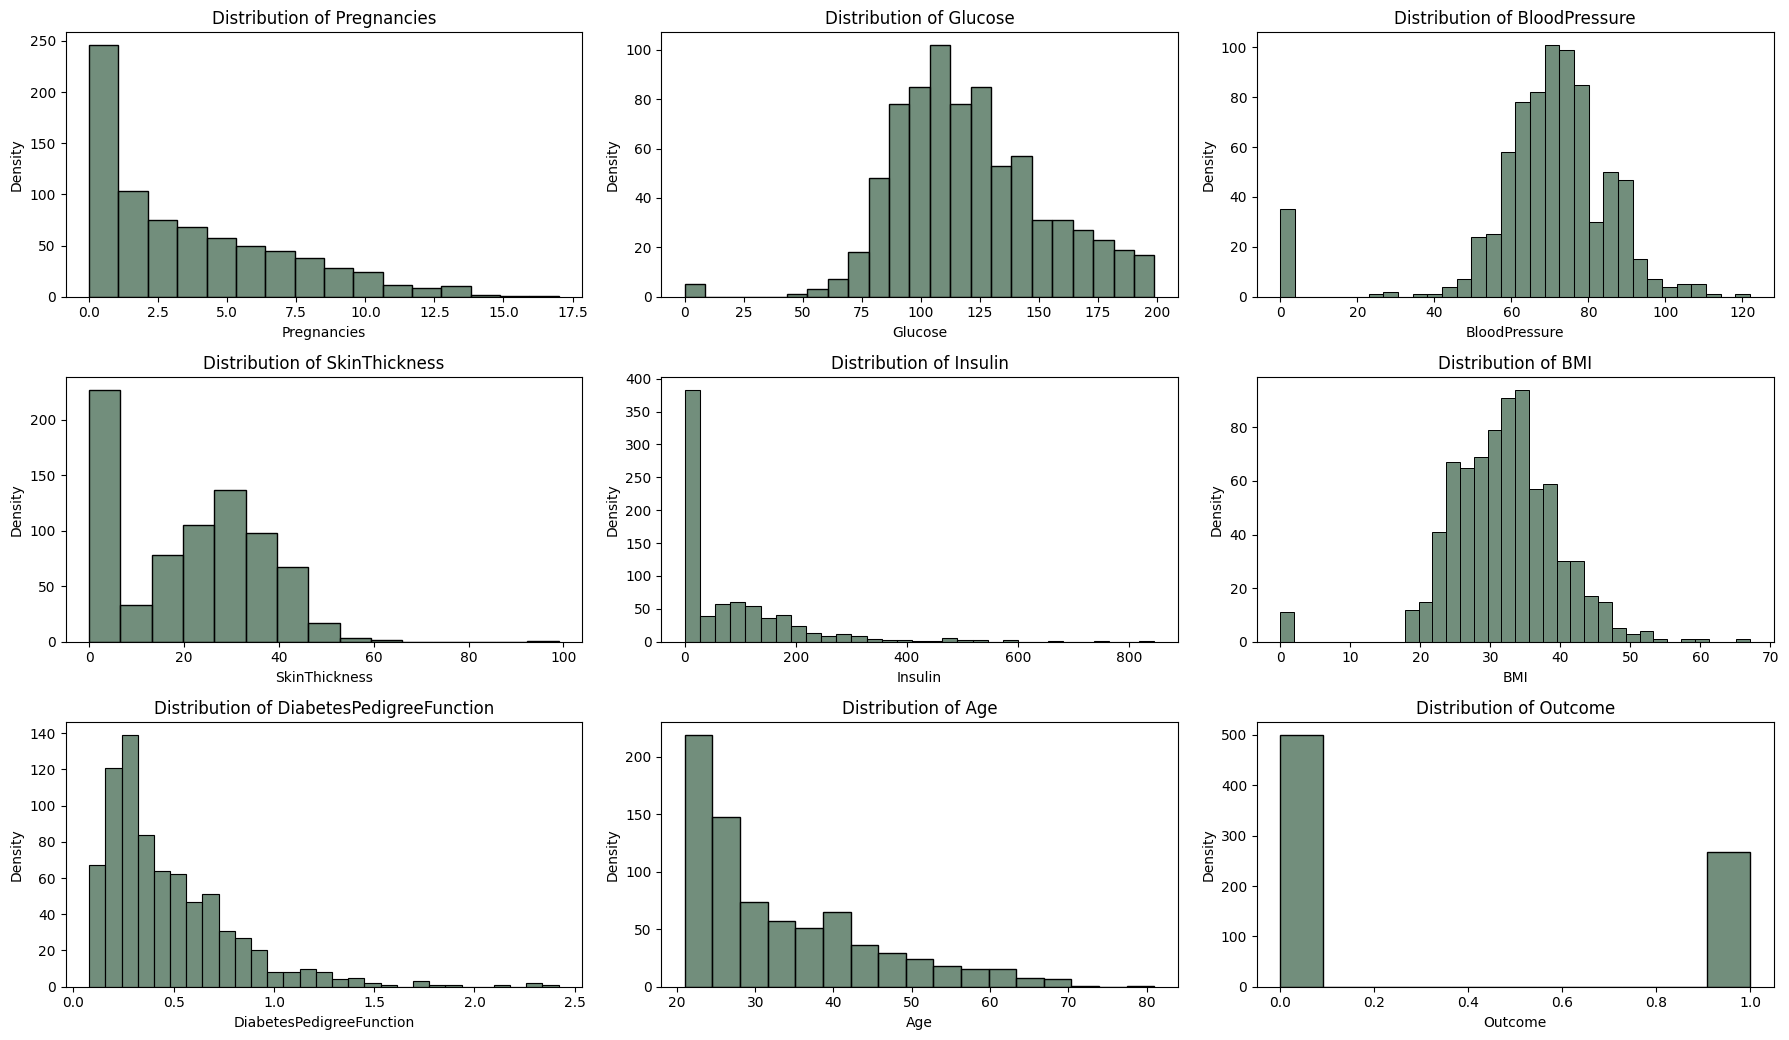

In [7]:
## YOUR CODE HERE
features = diabetes_df.columns
n_cols, n_rows = 3, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*3.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.histplot(diabetes_df[feature], kde=False, color='#436850', edgecolor='black', ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

diabetes_y = diabetes_df['Outcome']
diabetes_X = diabetes_df.drop(columns=['Outcome'])
X_dev, X_test, y_dev, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, stratify=diabetes_y, random_state=10)


# Comment:
# Based on the histograms, it appears that the outcome seems to
# be quite unbalanced (many more 0s than 1s). Therefore, a Stratified Split
# would be the best option, as it would maintain the distribution of
# the outcome variable across both datasets.

**1.5: Build a decision tree classifier to predict the onset of diabetes. What criterion (e.g., Gini impurity, entropy) did you choose for splitting, and why?**

In [8]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree_gini = DecisionTreeClassifier(random_state=10)
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=10)

tree_gini.fit(X_dev, y_dev)
tree_entropy.fit(X_dev, y_dev)
y_pred_gini_dev = tree_gini.predict(X_dev)
y_pred_gini_test = tree_gini.predict(X_test)
y_pred_entropy_dev = tree_entropy.predict(X_dev)
y_pred_entropy_test = tree_entropy.predict(X_test)

accuracy_gini_1 = accuracy_score(y_dev, y_pred_gini_dev)
accuracy_gini_2 = accuracy_score(y_test, y_pred_gini_test)
accuracy_entropy_1 = accuracy_score(y_dev, y_pred_entropy_dev)
accuracy_entropy_2 = accuracy_score(y_test, y_pred_entropy_test)
print(f"Gini accuracy on development dataset: {accuracy_gini_1}")
print(f"Gini accuracy on test dataset: {accuracy_gini_2}")
print(f"Entropy accuracy on development dataset: {accuracy_entropy_1}")
print(f"Entropy accuracy on test dataset: {accuracy_entropy_2}")


# Comment:
# I would choose entropy for splitting since it has better accuracy score
# than the gini method based on the results of test dataset.


Gini accuracy on development dataset: 1.0
Gini accuracy on test dataset: 0.6428571428571429
Entropy accuracy on development dataset: 1.0
Entropy accuracy on test dataset: 0.6948051948051948


**1.6: Evaluate your model using accuracy, precision, recall, and F1-score. What do these metrics reveal about your model's performance?**

In [9]:
## YOUR CODE HERE
test_precision = precision_score(y_test, y_pred_entropy_test)
test_recall = recall_score(y_test, y_pred_entropy_test)
test_f1_score = f1_score(y_test, y_pred_entropy_test)

print("Test Accuracy:", accuracy_entropy_2)
print("Test Precision:", test_precision)
print("Test Recall Score:", test_recall)
print("Test F1-Score:", test_f1_score)

# Both the accurracy and the precision is reletively low for the classifier
# on the test dataset. The low precision and recall suggest that this model
# is missing a significant number of cases (false positives and false negatives).

Test Accuracy: 0.6948051948051948
Test Precision: 0.5636363636363636
Test Recall Score: 0.5740740740740741
Test F1-Score: 0.5688073394495413


**1.8: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

Feature ranking:
Top 3 important features: ['Glucose', 'BMI', 'Age']


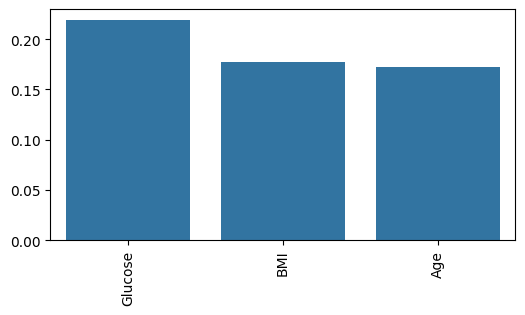

In [10]:
importances = tree_entropy.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
feature_names = diabetes_X.columns.tolist()
top_features = [feature_names[i] for i in indices[:3]]
print("Top 3 important features:", top_features)

plt.figure(figsize=(6, 3))
ax = sns.barplot(x=top_features, y=importances[list(indices)[:3]])
plt.xticks(rotation=90)
plt.show()

# "feature_importances_" is provided by the classifier, and we can sort the scores
# to get the top three most important features.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset**

In [11]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

X_dev, X_test, y_dev, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, stratify=diabetes_y, random_state=10)
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_dev, y_dev)
y_test_pred = random_forest_model.predict(X_test)

accuracy_score = accuracy_score(y_test, y_test_pred)
f1_score = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Test Accuracy:", accuracy_score)
print("Test Precision:", precision)
print("Test Recall Score:", recall)
print("Test F1-Score:", f1_score)

# Yes, it performs much better than the decision tree model.

Test Accuracy: 0.7792207792207793
Test Precision: 0.6851851851851852
Test Recall Score: 0.6851851851851852
Test F1-Score: 0.6851851851851852


**2.2 Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [12]:
from sklearn.tree import _tree
pure_flag = True

for tree in random_forest_model.estimators_:
    impurities = tree.tree_.impurity
    leaves = np.where(tree.tree_.children_left == tree.tree_.children_right)[0]
    if not all(impurities[leaves] == 0):
        pure_flag = False
        break
print(f"All trees have pure leaves: {pure_flag}")
# I examine each leaf node to ensure that all contained samples
# belong to the same category, and results showing the leaf as pure.

All trees have pure leaves: True


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**

In [13]:
## YOUR SOLUTION HERE
"""
I will pick "n_estimators" and "max_depth" as the two hyperparameters for tuning.

The number of trees in the forest is a crucial hyperparameter. A larger number
of trees can improve the model's performance and make the model more stable
by averaging more decision trees.Cross-validation can be used to find this optimal number of trees.

The depth of each tree is also important. Deeper trees can model more
complex patterns. Setting a maximum depth can help prevent overfitting as well.
"""

'\nI will pick "n_estimators" and "max_depth" as the two hyperparameters for tuning.\n\nThe number of trees in the forest is a crucial hyperparameter. A larger number\nof trees can improve the model\'s performance and make the model more stable\nby averaging more decision trees.Cross-validation can be used to find this optimal number of trees.\n\nThe depth of each tree is also important. Deeper trees can model more\ncomplex patterns. Setting a maximum depth can help prevent overfitting as well.\n'

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [14]:
## YOUR SOLUTION HERE
n_estimators_list = [10, 50, 100, 200, 300]
max_depth_list = [5, 8, 10, 15, 20]

"""
For "n_estimators", i want to start with a low number 10 to quickly
assess the initial performance of the model. Then, increasing the number
of trees in larger increments, such as 100, 200, 500, to cover a
wide range.
Similarly, increasing the maximum depth of a tree from a low number
enables it to capture deeper patterns within the data. The increment is
not quite large to avoid overfitting
"""

'\nFor "n_estimators", i want to start with a low number 10 to quickly\nassess the initial performance of the model. Then, increasing the number\nof trees in larger increments, such as 100, 200, 500, to cover a\nwide range.\nSimilarly, increasing the maximum depth of a tree from a low number\nenables it to capture deeper patterns within the data. The increment is\nnot quite large to avoid overfitting\n'

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

X_dev, X_test, y_dev, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, stratify=diabetes_y, random_state=10)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [5, 8, 10, 15, 20]
}

random_forest_clf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_dev, y_dev)

best_params = grid_search.best_params_
best_random_forest_clf = RandomForestClassifier(**best_params, random_state=10)
best_random_forest_clf.fit(X_dev, y_dev)
y_test_pred = best_random_forest_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-Score: {f1}")

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 50}
Test Accuracy: 0.7987012987012987
Test Precision: 0.7555555555555555
Test Recall: 0.6296296296296297
Test F1-Score: 0.6868686868686867


In [ ]:
# Yes, the performance improved over the plain-vanilla random forest model trained in Q2.1.

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.8? If they differ, which feature set makes more sense?**

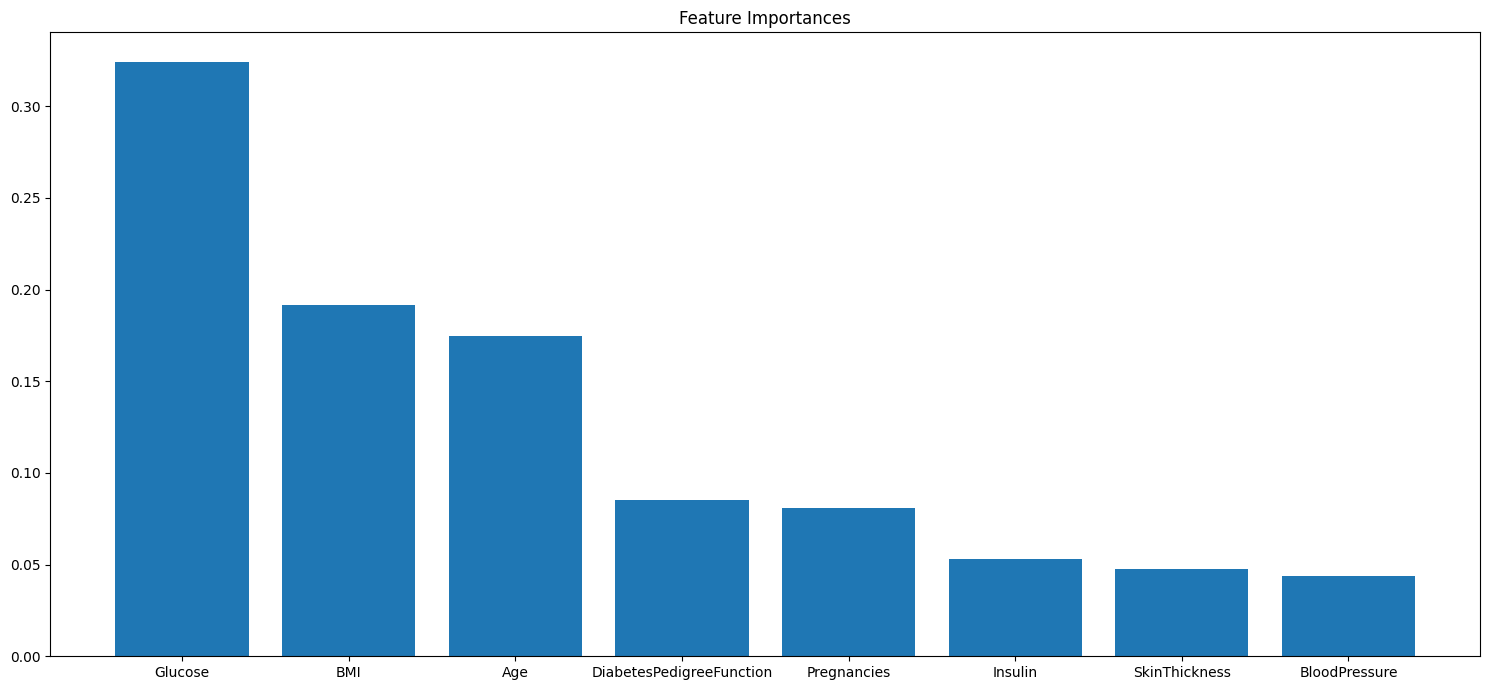

In [18]:
## YOUR CODE HERE
feature_importances = best_random_forest_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title('Feature Importances')
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(diabetes_X.columns)[sorted_indices], rotation=0)
plt.tight_layout()
plt.show()
# No, the top 3 important features remain the same even though the importance
# changes slightly for each of them.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [20]:
## YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import time

hgb_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [10, 50, 100],
}

start = time.time()
hgb_model = HistGradientBoostingClassifier(random_state=10)
grid_search = GridSearchCV(estimator=hgb_model, param_grid=hgb_param, cv=5, scoring='accuracy')
grid_search.fit(X_dev, y_dev)
end = time.time()

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_hgb_model = HistGradientBoostingClassifier(**best_params, random_state=42)
best_hgb_model.fit(X_dev, y_dev)
y_test_pred = best_hgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-Score: {f1}")
print(f"Time taken in seconds: {end-start}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 10}
Best Cross-validation Score: 0.7556977209116353
Test Accuracy: 0.7792207792207793
Test Precision: 0.6612903225806451
Test Recall: 0.7592592592592593
Test F1-Score: 0.7068965517241378
Time taken in seconds: 23.020066499710083


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [22]:
## YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import time

xgb_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'n_estimators': [10, 50, 100]
}

start = time.time()
xgb_classifier = XGBClassifier(use_label_encoder=False, random_state=10)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param, cv=10, scoring='accuracy')
grid_search.fit(X_dev, y_dev)
end = time.time()

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_xgb_classifier = XGBClassifier(**best_params, use_label_encoder=False, random_state=10)
best_xgb_classifier.fit(X_dev, y_dev)
y_test_pred = best_xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-Score: {f1}")
print(f"Time taken in seconds: {end-start}")

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10}
Best Cross-validation Score: 0.7607350608143839
Test Accuracy: 0.7987012987012987
Test Precision: 0.7254901960784313
Test Recall: 0.6851851851851852
Test F1-Score: 0.7047619047619048
Time taken in seconds: 20.732645273208618


In [ ]:
# It turns out XGBoost model has a slightly higher performance than the
# HistGradientBoosting model, especially on the precision part. The computational
# cost is similar.

**3.3: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

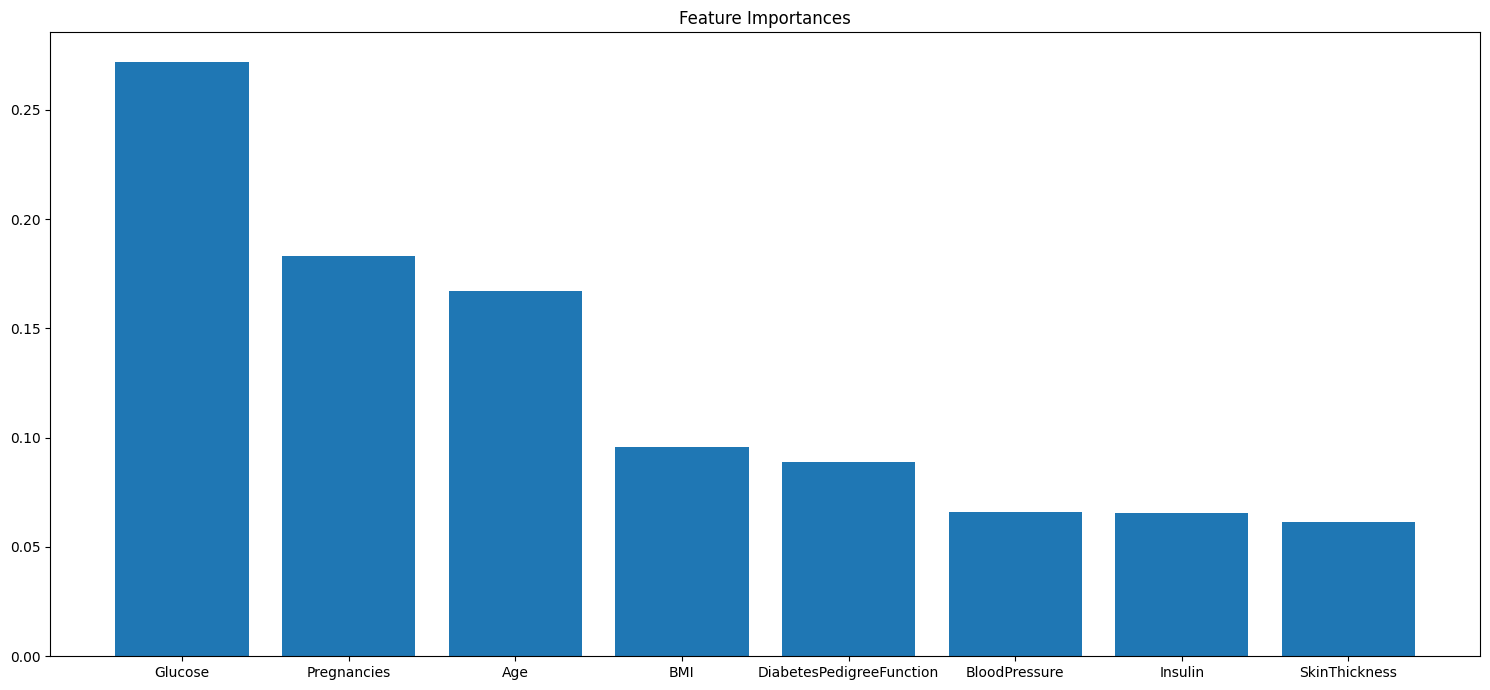

In [23]:
## YOUR CODE HERE
feature_importances = best_xgb_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title('Feature Importances')
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(diabetes_X.columns)[sorted_indices], rotation=0)
plt.tight_layout()
plt.show()

# Now the top 3 features change to "Glucose", "Pregnancies", and "Age".
# "BMI" obtained form random forest is replaced by "Pregnancies". I would
# trust the results from random forest since the precision score is higher.

 **3.4 Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [28]:
## YOUR CODE HERE
feature_names = X_dev.columns
feature_importance_tuples = [(feature, importance) for feature, importance in zip(feature_names, feature_importances)]
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)
top_7 = [feature for feature, _ in feature_importance_tuples[:7]]
print(top_7)

X_new_dev = X_dev[top_7]
X_new_test = X_test[top_7]

xgb_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'n_estimators': [10, 50, 100]
}

start = time.time()
xgb_classifier = XGBClassifier(use_label_encoder=False, random_state=10)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param, cv=10, scoring='accuracy')
grid_search.fit(X_new_dev, y_dev)
end = time.time()

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_xgb_classifier = XGBClassifier(**best_params, use_label_encoder=False, random_state=10)
best_xgb_classifier.fit(X_new_dev, y_dev)
y_test_pred = best_xgb_classifier.predict(X_new_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-Score: {f1}")
print(f"Time taken in seconds: {end-start}")

['Glucose', 'Pregnancies', 'Age', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin']
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Cross-validation Score: 0.7672395557905869
Test Accuracy: 0.7987012987012987
Test Precision: 0.7090909090909091
Test Recall: 0.7222222222222222
Test F1-Score: 0.7155963302752293
Time taken in seconds: 25.853966236114502


In [29]:
# The accuracy remains nearly unchanged compared to the previous
# results, and this not supprising since the model complexity does not
# change much. However, the precision of the new model decreases
# a little bit, which can be attributed to the information loss
# after dropping some features.